## Importing Libraries

In [ ]:
import pandas as pd
import litstudy
import matplotlib.pyplot as plt


import spacy
from spacy import displacy

#import seaborn as sbs
#import os
#import sys
#import numpy as np

## Data Preparation, Exploration and Analysis

In [12]:
data = pd.read_csv('/Users/leticiadavordzi/Documents/GitHub/DataSciencePortfolio/Healthcare Data Analytics/medquad.csv')

In [13]:
data.head()

,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
...,...,...,...,...
16407,What is (are) Diabetic Neuropathies: The Nerve...,Focal neuropathy appears suddenly and affects ...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
16408,How to prevent Diabetic Neuropathies: The Nerv...,The best way to prevent neuropathy is to keep ...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
16409,How to diagnose Diabetic Neuropathies: The Ner...,Doctors diagnose neuropathy on the basis of sy...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
16410,What are the treatments for Diabetic Neuropath...,The first treatment step is to bring blood glu...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...


In [15]:
data.columns.values

array(['question', 'answer', 'source', 'focus_area'], dtype=object)

In [16]:
# Take a look at the duplicates first before dropping them
#data = data.drop_duplicates()
#data

In [33]:
data.head()

,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma


In [35]:
# For the purposes of using litstudy package, the columns will be renamed.
data1 = data.rename(columns={'question':'Title','answer':'Abstract'})
data1.head()

/var/folders/0j/970nc92d3ds1q6tcbcd2ktxr0000gn/T/ipykernel_8979/589433211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'question':'Title','answer':'Abstract'},inplace=True)


,Title,Abstract,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma


In [36]:
data1.to_csv('df.csv',index=False)

In [37]:
docs = litstudy.load_csv('df.csv')
print(len(docs), 'questions loaded from final table')

16364 questions loaded from final table


<Axes: title={'center': 'Publication source'}, xlabel='No. of documents'>

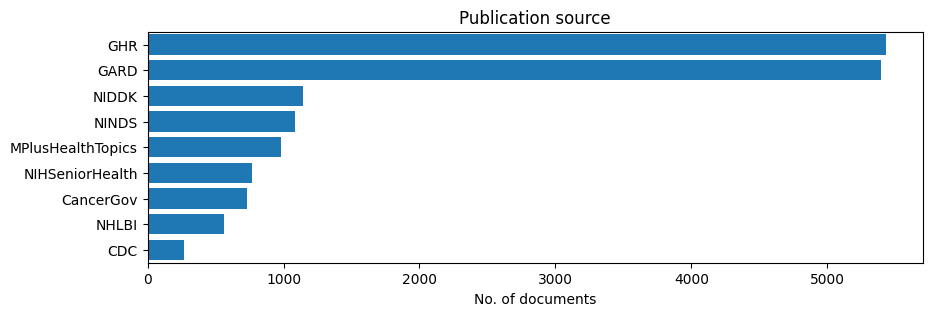

In [50]:
plt.figure(figsize=(10, 3))
litstudy.plot_source_histogram(docs)

In [39]:
corpus = litstudy.build_corpus(docs, ngram_threshold=0.85)

In [41]:
litstudy.compute_word_distribution(corpus).filter(like='_', axis=0).sort_index()

,count
acanthosis_nigricans,39
adenomatous_polyposis,24
aganglionic_megacolon,52
aicardi_goutieres,20
alkaline_phosphatase,24
...,...
watchful_waiting,32
web_site,112
widely_spaced,108
words_bold,19


<Axes: title={'center': 'Top words'}, ylabel='% of documents'>

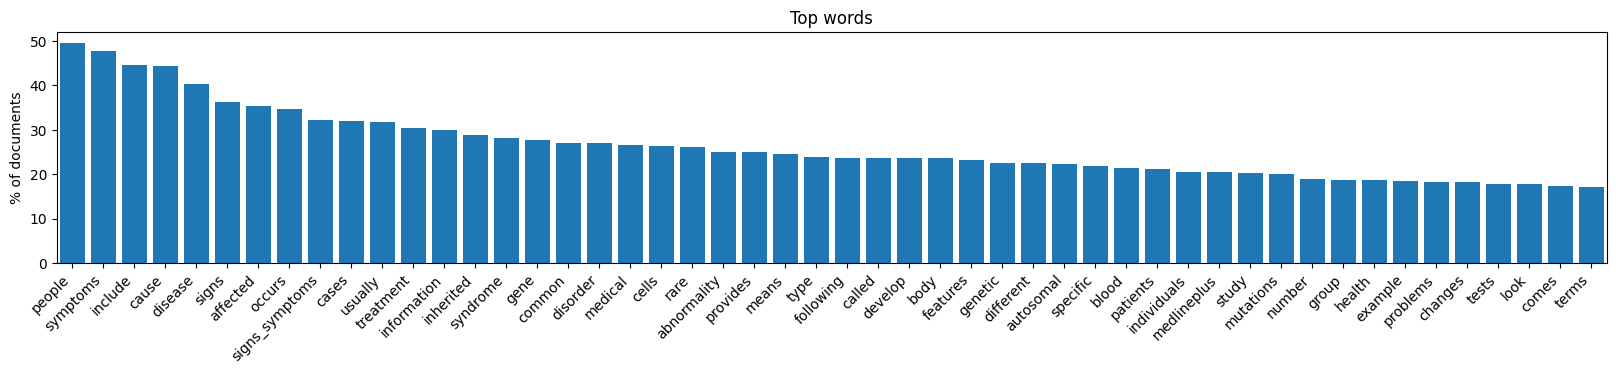

In [46]:
# Visualization of the word distribution in corpus
litstudy.compute_word_distribution(corpus).filter(like='_', axis=0).sort_index()
plt.figure(figsize=(20, 3))
litstudy.plot_word_distribution(corpus, limit=50, title="Top words", vertical=True, label_rotation=45)

### Preliminary Topic Modelling

In [51]:
# Topic Modelling - NMF
num_topics = 10
topic_model = litstudy.train_nmf_model(corpus, num_topics, max_iter=250)

In [52]:
# Printing the top words for each topic
for i in range(num_topics):
    print(f'Topic {i+1}:', topic_model.best_tokens_for_topic(i))

Topic 1: ['copy', 'inherited', 'mutations', 'autosomal_recessive', 'recessive']
Topic 2: ['diagnosis_management', 'resources', 'management', 'diagnosis', 'tests']
Topic 3: ['trials', 'clinical', 'clinical_trials', 'research', 'ninds']
Topic 4: ['infection', 'tumor', 'pain', 'treatment', 'brain']
Topic 5: ['cancer', 'tumor', 'cells', 'stage', 'radiation']
Topic 6: ['cancer', 'risk', 'breast', 'factors', 'prostate']
Topic 7: ['frequency', 'symptoms', 'number', 'patients', 'signs']
Topic 8: ['protein', 'gene', 'mutations', 'cells', 'function']
Topic 9: ['syndrome', 'affected', 'prevalence', 'unknown', 'disorder']
Topic 10: ['heart', 'blood', 'diabetes', 'pressure', 'arteries']


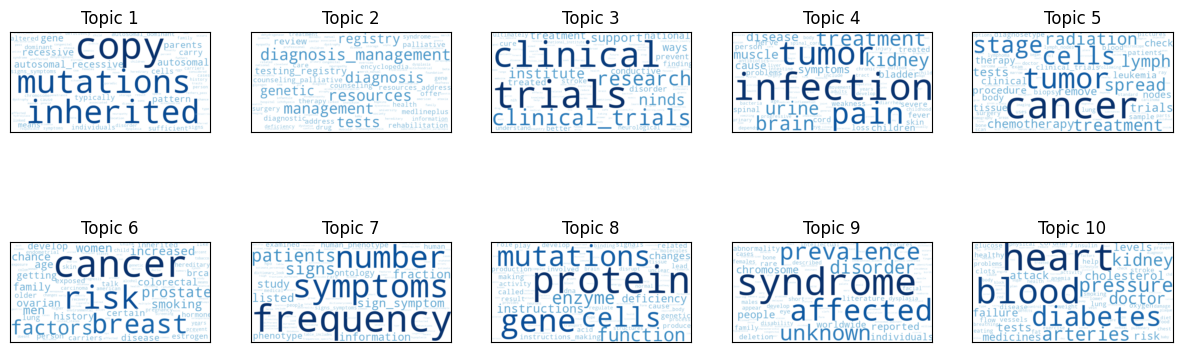

In [53]:
# Landscape plot - word clouds for each topic
plt.figure(figsize=(15, 5))
litstudy.plot_topic_clouds(topic_model, ncols=5)

/Users/leticiadavordzi/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:841: FutureWarning: The parameter `square_distances` has not effect and will be removed in version 1.3.
  warnings.warn(


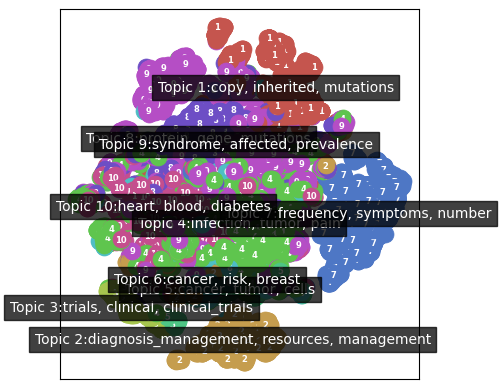

In [54]:
#plt.figure(figsize=(20, 20))
litstudy.plot_embedding(corpus, topic_model)

In [60]:
topic_id = topic_model.best_topic_for_token('risk')

In [61]:
# Checking for accuracy of identifying topic in document
for doc_id in topic_model.best_documents_for_topic(topic_id, limit=5):
    print(docs[int(doc_id)].title)

Who is at risk for Ovarian Epithelial, Fallopian Tube, and Primary Peritoneal Cancer? ?
Who is at risk for Gallbladder Cancer? ?
Who is at risk for Nasopharyngeal Cancer? ?
Who is at risk for Breast Cancer? ?
Who is at risk for Lip and Oral Cavity Cancer? ?


In [65]:
# higher threshold will reduce the number of articles based on how well they relate to the topic.
threshold = 0.4
dl_topic = topic_model.doc2topic[:, topic_id] > threshold

docs = docs.add_property('dl_topic', dl_topic)

groups = {
    'risk related': 'dl_topic',
    'other': 'not dl_topic', 
}

<Axes: title={'center': 'Publication source'}, xlabel='No. of documents'>

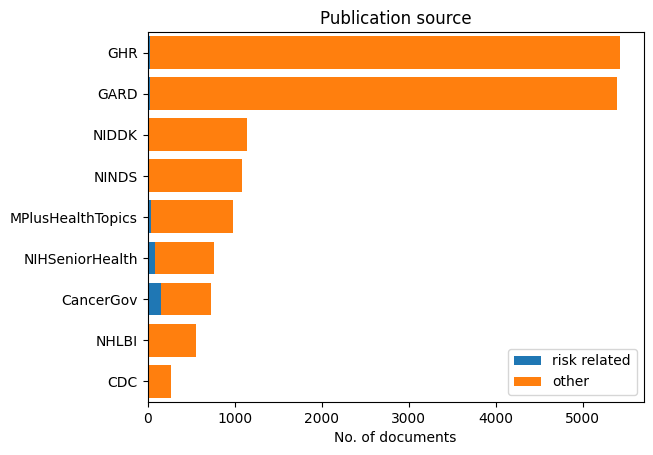

In [66]:
litstudy.plot_source_histogram(docs, groups=groups, stacked=True)

In [67]:
table = litstudy.compute_source_histogram(docs, groups=groups)
table.div(table.sum(axis=1), axis=0) * 100

,risk related,other
GHR,0.460405,99.539595
GARD,0.444939,99.555061
NIDDK,1.486014,98.513986
NINDS,0.000000,100.000000
MPlusHealthTopics,4.179409,95.820591
NIHSeniorHealth,10.793238,89.206762
CancerGov,21.262003,78.737997
NHLBI,3.041145,96.958855
CDC,3.703704,96.296296


In [68]:
# Compute histogram by publication venue
table = litstudy.compute_source_histogram(docs, groups=groups)

# Add column 'total'
table['total'] = table['risk related'] + table['other']

In [69]:
table

,risk related,other,total
GHR,25,5405,5430
GARD,24,5370,5394
NIDDK,17,1127,1144
NINDS,0,1088,1088
MPlusHealthTopics,41,940,981
NIHSeniorHealth,83,686,769
CancerGov,155,574,729
NHLBI,17,542,559
CDC,10,260,270


In [70]:
# Add column 'ratio'
table['ratio'] = table['risk related'] / table['total'] * 100

# Sort by ratio in descending order
table.sort_values(by='ratio', ascending=False)

,risk related,other,total,ratio
CancerGov,155,574,729,21.262003
NIHSeniorHealth,83,686,769,10.793238
MPlusHealthTopics,41,940,981,4.179409
CDC,10,260,270,3.703704
NHLBI,17,542,559,3.041145
NIDDK,17,1127,1144,1.486014
GHR,25,5405,5430,0.460405
GARD,24,5370,5394,0.444939
NINDS,0,1088,1088,0.000000


## Exploring NER

In [ ]:
ner_pipeline = spacy.load("en_core_web_sm")

In [ ]:
ner_pipeline_labels = ner_pipeline.get_pipe("ner").labels
ner_pipeline_labels

In [ ]:
spacy.explain("CARDINAL")

In [ ]:
spacy.explain("LOC")

In [ ]:
spacy.explain("FAC")

In [ ]:
spacy.explain("GPE")

In [ ]:
spacy.explain("NORP")

In [71]:
data

,Title,Abstract,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
...,...,...,...,...
16407,What is (are) Diabetic Neuropathies: The Nerve...,Focal neuropathy appears suddenly and affects ...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
16408,How to prevent Diabetic Neuropathies: The Nerv...,The best way to prevent neuropathy is to keep ...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
16409,How to diagnose Diabetic Neuropathies: The Ner...,Doctors diagnose neuropathy on the basis of sy...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
16410,What are the treatments for Diabetic Neuropath...,The first treatment step is to bring blood glu...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
